In [22]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.metrics import balanced_accuracy_score, ConfusionMatrixDisplay, confusion_matrix
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense
from sklearn.utils import class_weight

In [23]:
# Extract data
X = np.load('Xtrain_Classification_Part2.npy')
y = np.load('Ytrain_Classification_Part2.npy')

X_train, X_validate, train_labels, test_labels = train_test_split(X,y)


In [24]:
class_names = ['caucasian', 'african', 'asian', 'indian']

# Reshape to 50x50 pixel images
pixels = 50
train_images = []
test_images = []

for image in X_train:
    train_images.append(image.reshape(pixels, pixels))

for image in X_validate:
    test_images.append(image.reshape(pixels, pixels))

train_images = np.array(train_images)
test_images = np.array(test_images)

In [25]:
# Normalizing
train_images = train_images / 255.0
test_images = test_images / 255.0

X_train = X_train / 255.0
X_validate = X_validate / 255.0

In [26]:
# Sort data based on ethnicity

caucasian_count = 0
african_count = 0
asian_count = 0
indian_count = 0

caucasian_train = []
african_train = []
asian_train = []
indian_train = []

for index, label in enumerate(train_labels):
    if label == 0:
        caucasian_count += 1
        caucasian_train.append(train_images[index])
    elif label == 1:
        african_count += 1
        african_train.append(train_images[index])
    elif label == 2:
        asian_count += 1
        asian_train.append(train_images[index])
    elif label == 3:
        indian_count += 1
        indian_train.append(train_images[index])

In [27]:
# Augment caucasian data by adding mirrored images

caucasian_train = np.array(caucasian_train)
caucasian_augmented = []

caucasian_flipped = caucasian_train[:,:,::-1]

for index, image in enumerate(caucasian_flipped):
    caucasian_augmented.append(caucasian_train[index])
    caucasian_augmented.append(image)

caucasian_augmented = np.array(caucasian_augmented)

In [28]:
# Augment african data by adding mirrored images

african_train = np.array(african_train)
african_augmented = []

african_flipped = african_train[:,:,::-1]

for index, image in enumerate(african_flipped):
    african_augmented.append(african_train[index])
    african_augmented.append(image)

african_augmented = np.array(african_augmented)

In [29]:
# Augment asian data by adding mirrored images

asian_train = np.array(asian_train)
asian_augmented = []

asian_flipped = asian_train[:,:,::-1]

for index, image in enumerate(asian_flipped):
    asian_augmented.append(asian_train[index])
    asian_augmented.append(image)

asian_augmented = np.array(asian_augmented)

In [30]:
# Augment indian data by adding mirrored images

indian_train = np.array(indian_train)
indian_augmented = []

indian_flipped = indian_train[:,:,::-1]

for index, image in enumerate(indian_flipped):
    indian_augmented.append(indian_train[index])
    indian_augmented.append(image)

indian_augmented = np.array(indian_augmented)

In [31]:
# Update training set

new_train_images = []
new_train_labels = []

count_caucasian = 0
count_african = 0
count_asian = 0
count_indian = 0

for index, label in enumerate(train_labels):
    if label == 0:
        new_train_images.append(train_images[index].reshape(pixels,pixels))
        new_train_labels.append(label)
        count_caucasian += 1
    elif label == 1:
        new_train_images.append(african_augmented[count_african].reshape(pixels,pixels))
        new_train_labels.append(label)
        new_train_images.append(african_augmented[count_african + african_count].reshape(pixels,pixels))
        new_train_labels.append(label)
        count_african += 1
    elif label == 2:
        new_train_images.append(asian_augmented[count_asian].reshape(pixels,pixels))
        new_train_labels.append(label)
        new_train_images.append(asian_augmented[count_asian + asian_count].reshape(pixels,pixels))
        new_train_labels.append(label)
        count_asian += 1
    elif label == 3:
        new_train_images.append(indian_augmented[count_indian].reshape(pixels,pixels))
        new_train_labels.append(label)
        new_train_images.append(indian_augmented[count_indian + indian_count].reshape(pixels,pixels))
        new_train_labels.append(label)
        count_indian += 1

new_train_images = np.array(new_train_images)

In [32]:
# Building CNN Model
model = keras.Sequential()
model.add(Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=(50, 50, 1)))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.2))
model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.2))
model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(4, activation="softmax"))

In [33]:
model.compile(  optimizer='adam',
                loss = 'sparse_categorical_crossentropy', #'binary_crossentropy',
                metrics = ['accuracy'])

In [34]:
# Calculate weights
class_weights = class_weight.compute_class_weight('balanced', np.unique(new_train_labels), new_train_labels)

print(class_weights)

classes = [0, 1, 2, 3]
dict_weights = dict(zip(classes, class_weights.T))

print(dict_weights)

[0.56837037 3.60573308 0.95816683 1.08744331]
{0: 0.5683703703703704, 1: 3.605733082706767, 2: 0.9581668331668332, 3: 1.0874433106575965}


C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass classes=[0. 1. 2. 3.], y=[3.0, 3.0, 0.0, 0.0, 3.0, 3.0, 2.0, 2.0, 3.0, 3.0, 0.0, 0.0, 3.0, 3.0, 0.0, 2.0, 2.0, 2.0, 2.0, 0.0, 0.0, 3.0, 3.0, 2.0, 2.0, 0.0, 0.0, 0.0, 0.0, 3.0, 3.0, 0.0, 0.0, 0.0, 2.0, 2.0, 0.0, 0.0, 0.0, 0.0, 3.0, 3.0, 3.0, 3.0, 0.0, 2.0, 2.0, 3.0, 3.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 3.0, 3.0, 0.0, 0.0, 2.0, 2.0, 0.0, 0.0, 0.0, 0.0, 3.0, 3.0, 3.0, 3.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 2.0, 2.0, 3.0, 3.0, 1.0, 1.0, 0.0, 0.0, 0.0, 3.0, 3.0, 2.0, 2.0, 0.0, 2.0, 2.0, 0.0, 0.0, 0.0, 2.0, 2.0, 2.0, 2.0, 0.0, 0.0, 2.0, 2.0, 1.0, 1.0, 0.0, 2.0, 2.0, 0.0, 3.0, 3.0, 0.0, 1.0, 1.0, 3.0, 3.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 3.0, 3.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 2.0, 2.0, 0.0, 3.0, 3.0, 0.0, 0.0, 0.0, 1.0, 1.0, 2.0, 2.0, 0.0, 0.0, 3.0, 3.0, 0.0, 3.0, 3.0, 0.0, 3.0, 3.0, 0.0, 2.0, 2.0, 0.0, 0.0, 0.0, 3.0, 3.0, 2.0, 2.0, 1.0, 1.0, 0.0, 0.0, 0.0, 3.0, 3.0, 0.0, 0.0, 0.0, 0.0, 0.0, 2.0, 2.0, 3.

In [35]:
# Train model
new_train_images = np.reshape(new_train_images, (len(new_train_images), 50, 50, 1))
test_images = np.reshape(test_images, (len(test_images),50, 50, 1))

new_train_labels = np.asarray(new_train_labels)

history = model.fit(new_train_images, new_train_labels, validation_data = (test_images, test_labels), epochs = 10, class_weight=dict_weights)

Epoch 1/10
240/240 [==============================] - 31s 128ms/step - loss: 1.2507 - accuracy: 0.4507 - val_loss: 0.9605 - val_accuracy: 0.6221
Epoch 2/10
240/240 [==============================] - 35s 147ms/step - loss: 0.8951 - accuracy: 0.6355 - val_loss: 0.9371 - val_accuracy: 0.6107
Epoch 3/10
240/240 [==============================] - 38s 158ms/step - loss: 0.7527 - accuracy: 0.7013 - val_loss: 0.8188 - val_accuracy: 0.6911
Epoch 4/10
240/240 [==============================] - 35s 147ms/step - loss: 0.6560 - accuracy: 0.7417 - val_loss: 0.8289 - val_accuracy: 0.6770
Epoch 5/10
240/240 [==============================] - 36s 151ms/step - loss: 0.5986 - accuracy: 0.7714 - val_loss: 0.7383 - val_accuracy: 0.7101
Epoch 6/10
240/240 [==============================] - 32s 134ms/step - loss: 0.5256 - accuracy: 0.7954 - val_loss: 0.6005 - val_accuracy: 0.7752
Epoch 7/10
240/240 [==============================] - 33s 139ms/step - loss: 0.4831 - accuracy: 0.8084 - val_loss: 0.5773 - val_ac

In [36]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 50, 50, 32)        320       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 25, 25, 32)        0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 25, 25, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 25, 25, 64)        18496     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 12, 12, 64)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 12, 12, 64)       

In [37]:
# Accuracy
test_images = test_images.reshape(-1, 50, 50, 1)
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('Test accuracy:', test_acc)

58/58 [==============================] - 2s 30ms/step - loss: 0.5425 - accuracy: 0.7980
Test accuracy: 0.7980455756187439


In [38]:
predictions = model.predict(test_images) #test_images
predictions

array([[1.7876951e-02, 8.2857697e-04, 9.4538480e-01, 3.5909783e-02],
       [9.8095441e-01, 1.1814487e-03, 1.5376048e-02, 2.4881456e-03],
       [9.9783307e-01, 1.3981607e-04, 4.7277115e-04, 1.5543848e-03],
       ...,
       [9.9941432e-01, 2.2651236e-06, 5.5314752e-04, 3.0278765e-05],
       [3.9572769e-01, 2.6152354e-01, 1.2147612e-01, 2.2127266e-01],
       [9.9631613e-01, 1.8402488e-05, 1.2602094e-03, 2.4052779e-03]],
      dtype=float32)

In [39]:
# Turn predictions into labels
y_predicted = []

for i in predictions:
    y_predicted.append(np.argmax(i))

y_predicted = np.array(y_predicted)
print(y_predicted)

[2 0 0 ... 0 0 0]


BACC = 74.05050434721257


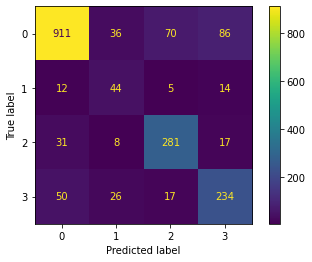

In [40]:
bacc = balanced_accuracy_score(test_labels, y_predicted)

cm = confusion_matrix(test_labels, y_predicted)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)

disp.plot()
print(f"BACC = {bacc * 100}")

In [41]:
def plot_image(i, predictions_array, true_label, img):
    predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(img, cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'

    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                            100*np.max(predictions_array),
                                            class_names[true_label]),
                                            color = color)

def plot_value_array(i, predictions_array, true_label):
    predictions_array, true_label = predictions_array[i], true_label[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color = '#777777')
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)

    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('green')

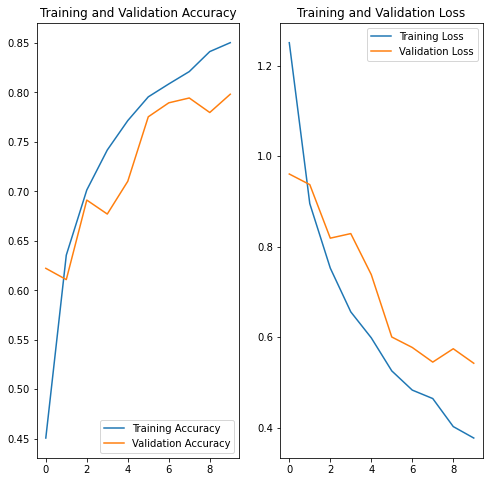

In [42]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(10)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

